In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import cv2
import os
import sys
import glob
import urllib.request
import json


In [2]:
file = pd.read_csv("http://ladi.s3-us-west-2.amazonaws.com/Labels/ladi_images_metadata.csv")
file

,uuid,timestamp,gps_lat,gps_lon,gps_alt,file_size,width,height,s3_path,url
0,a13fb353cca1f5e8060f95c80deb0c49e9a21f91,2016-01-16 07:34:55,29.623744,-95.652153,26.0,3497125.0,4608.0,3456.0,s3://ladi/Images/FEMA_CAP/1012/20118/VIRB0002_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
1,03e5da2bc5e32cd7d58a164eefce499e2f14e06f,2014-06-24 13:09:20,32.386939,-86.344467,489.0,3518243.0,4608.0,3456.0,s3://ladi/Images/FEMA_CAP/1012/20118/VIRB0820_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
2,c97e83122e14ec5fa5cfa6e2c911e066d8a07f7c,2014-06-24 11:06:27,NaN,NaN,NaN,8006650.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0015_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
3,c534eb158948b63508eab34a667bf495e129f455,2014-06-24 11:20:03,NaN,NaN,NaN,8821238.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0123_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
4,1c702459e21e5a7e7fec5eefaab42f5e5124113a,2014-06-24 11:21:07,32.371777,-86.345887,459.0,8385536.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0126_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
...,...,...,...,...,...,...,...,...,...,...
580746,95fabbdbbb494beab517b5fea25a4e430d8fbcef,2020-01-27 12:01:31,18.002950,-66.896370,101.8,3413576.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580747,4b590e5634dae396db6c838844d7670e5ef9e7f6,2020-01-27 12:00:25,18.003440,-66.896118,101.8,3307879.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580748,bb7f86f1e9ab1a1ab3ea9e13cda998ab6e1bbb6d,2020-01-27 12:02:25,18.003280,-66.895955,101.8,3989427.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580749,c9e5c19cb7cccf181d11b707f1a47b80341710b6,2020-01-27 12:00:45,18.003355,-66.896256,101.8,3722615.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...


In [3]:
file = pd.read_csv("http://ladi.s3-us-west-2.amazonaws.com/Labels/ladi_images_metadata.csv")
maas = file.loc[(file['gps_lat'] < 42.368520) & (file['gps_lat'] > 41.791453) & (file['gps_lon'] > -73.255974) &( file['gps_lon'] < - 69.998533)] 
maas
maas.to_csv('massachusetts.csv') 

In [4]:
for idx, url in enumerate(maas['url']):
    if idx<50:
        urllib.request.urlretrieve(url, 'mass/images/{}.jpg'.format(idx))


In [42]:
# Take initial guess of intrinsic parameters through metadata
!opensfm extract_metadata mass/

# Detect features points 
!opensfm detect_features mass/

# Match feature points across images
!opensfm match_features mass/

# This creates "tracks" for the features. That is to say, if a feature in image 1 is matched with one in image 2,
# and in turn that one is matched with one in image 3, then it links the matches between 1 and 3. In this case, 
# it does not matter since we only have two images
!opensfm create_tracks mass/

# Calculates the essential matrix, the camera pose and the reconstructed feature points
!opensfm reconstruct mass/

# For visualization using Open3D
!opensfm export_ply mass/

2020-07-28 21:23:28,029 INFO: Extracting EXIF for 9.jpg
2020-07-28 21:23:28,178 INFO: Extracting EXIF for 26.jpg
2020-07-28 21:23:28,259 INFO: Extracting EXIF for 14.jpg
2020-07-28 21:23:28,388 INFO: Extracting EXIF for 16.jpg
2020-07-28 21:23:28,517 INFO: Extracting EXIF for 43.jpg
2020-07-28 21:23:28,587 INFO: Extracting EXIF for 30.jpg
2020-07-28 21:23:28,665 INFO: Extracting EXIF for 23.jpg
2020-07-28 21:23:28,752 INFO: Extracting EXIF for 12.jpg
2020-07-28 21:23:28,881 INFO: Extracting EXIF for 10.jpg
2020-07-28 21:23:29,010 INFO: Extracting EXIF for 25.jpg
2020-07-28 21:23:29,089 INFO: Extracting EXIF for 1.jpg
2020-07-28 21:23:29,218 INFO: Extracting EXIF for 24.jpg
2020-07-28 21:23:29,297 INFO: Extracting EXIF for 13.jpg
2020-07-28 21:23:29,417 INFO: Extracting EXIF for 4.jpg
2020-07-28 21:23:29,542 INFO: Extracting EXIF for 22.jpg
2020-07-28 21:23:29,622 INFO: Extracting EXIF for 21.jpg
2020-07-28 21:23:29,695 INFO: Extracting EXIF for 35.jpg
2020-07-28 21:23:29,773 INFO: Extr

In [43]:
!opensfm undistort mass/

!opensfm compute_depthmaps mass/

2020-07-28 21:26:25,049 DEBUG: Undistorting the reconstruction
2020-07-28 21:26:25,081 DEBUG: Undistorting image 0.jpg
2020-07-28 21:26:30,543 DEBUG: Undistorting image 1.jpg
2020-07-28 21:26:36,028 DEBUG: Undistorting image 2.jpg
2020-07-28 21:26:41,573 DEBUG: Undistorting image 3.jpg
2020-07-28 21:26:47,032 DEBUG: Undistorting image 4.jpg
2020-07-28 21:26:54,706 INFO: Computing neighbors
2020-07-28 21:26:54,737 INFO: Computing depthmap for image 0.jpg with PATCH_MATCH_SAMPLE
2020-07-28 21:27:14,337 INFO: Computing depthmap for image 1.jpg with PATCH_MATCH_SAMPLE
2020-07-28 21:27:39,077 INFO: Computing depthmap for image 2.jpg with PATCH_MATCH_SAMPLE
2020-07-28 21:28:03,815 INFO: Computing depthmap for image 3.jpg with PATCH_MATCH_SAMPLE
2020-07-28 21:28:29,293 INFO: Computing depthmap for image 4.jpg with PATCH_MATCH_SAMPLE
2020-07-28 21:28:52,985 INFO: Cleaning depthmap for image 0.jpg
2020-07-28 21:28:55,158 INFO: Cleaning depthmap for image 1.jpg
2020-07-28 21:28:57,721 INFO: Clea

In [5]:
# Origin of our reconstruction, as given by the reference_lla.json (made from the reconstruction)
with open("mass/reference_lla.json", "r") as f:
    reference_lla = json.load(f)
    latitude=reference_lla["latitude"]
    longitude=reference_lla["longitude"]
    altitude=reference_lla["altitude"]

# This is the json file that contains the reconstructed feature points
with open("mass/reconstruction.json", "r") as f:
    reconstructions = json.load(f)

In [6]:
try:
    from pymap3d import enu2geodetic
except:
    !pip install pymap3d
    from pymap3d import enu2geodetic
from opensfm.features import denormalized_image_coordinates

# reading the csv
tracks = pd.read_csv("mass/tracks.csv", sep="\t", skiprows=1, names=["image_name", "track_id", "feature_id", "x", "y", "s", "R", "G", "B"])

# we need to denormalize the coordinates to turn them into regular pixel coordinates
normalized_coor = tracks[["x", "y", "s"]]
denormalized_coor = denormalized_image_coordinates(normalized_coor.values, 4496, 3000)

# create a new column with the denormalized coordinates
tracks["denorm_x"] = denormalized_coor[:, 0]
tracks["denorm_y"] = denormalized_coor[:, 1]

In [7]:
from shapely.geometry import Polygon
import geopandas as gpd

img_name_list = []
poly_list = []

for reconst in reconstructions:
    for shot in reconst["shots"]:
        # some housekeeping
        shot_name = shot.split(".")[0]
        img = cv2.imread("mass/images/"+shot) 
        h,w,_ = img.shape
        
        # here we get the features from the image and their corresponding reconstructed features
        reconst_ids = list(map(int, reconst["points"].keys()))
        tracks_shot = tracks[(tracks["image_name"] == shot) & (tracks["track_id"].isin(reconst_ids))]
        
        normalized_coor = tracks_shot[["x", "y", "s"]]
        denormalized_coor = denormalized_image_coordinates(normalized_coor.values, w, h)
        
        tracks_shot["denorm_x"] = denormalized_coor[:, 0]
        tracks_shot["denorm_y"] = denormalized_coor[:, 1]
        
        denorm_shot = np.round(tracks_shot[["denorm_x", "denorm_y"]].values)
        reconst_shot = np.array([reconst["points"][str(point)]["coordinates"] for point in tracks_shot["track_id"]])
        
        # transformation for the new orthorectified image
        H, inliers = cv2.findHomography(denorm_shot, reconst_shot[:, :2],cv2.RANSAC,5.0)
        
        
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,H)[:,0,:]
        print(dst)
                
        geo_shot = np.array([enu2geodetic(dst[i, 0],dst[i, 1],0,latitude,longitude,altitude) for i in range(dst.shape[0])])  
        
        poly_points_list = geo_shot[:, :2].tolist()
        poly_points_tuples = tuple(map(tuple, poly_points_list))
        print(poly_points_tuples)
        
        img_name_list.append(shot_name)
        poly_list.append(Polygon(poly_points))

used_images = gpd.GeoDataFrame({'image_name':img_name_list, 'geometry':poly_list}, crs='EPSG:4326')
used_images

[[  1698.0835 -16773.39  ]
 [  9882.963  -14351.711 ]
 [  9828.843  -13929.247 ]
 [  2781.1558 -12240.3125]]
((42.056900885575324, -70.73361246258916), (42.07864272332257, -70.63469323029294), (42.082446791232115, -70.63534014559883), (42.09770862605715, -70.72050669106746))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NameError: name 'poly_points' is not defined

In [48]:
tracks_shot['geometry'] = Polygon
tracks_shot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,image_name,track_id,feature_id,x,y,s,R,G,B,denorm_x,denorm_y,geometry
65425,12.jpg,10178,944,-0.097210,0.066295,0.001949,47,55,57,2416.23760,2397.2706,<class 'shapely.geometry.polygon.Polygon'>
65426,12.jpg,10174,1860,-0.078433,0.085991,0.002253,45,24,19,2528.90080,2515.4490,<class 'shapely.geometry.polygon.Polygon'>
65429,12.jpg,10170,223,0.001737,0.051213,0.001803,67,65,71,3009.92488,2306.7798,<class 'shapely.geometry.polygon.Polygon'>
65430,12.jpg,10169,4202,-0.138079,-0.067357,0.004781,33,35,38,2171.02600,1595.3574,<class 'shapely.geometry.polygon.Polygon'>
65432,12.jpg,10163,4647,-0.217622,0.070484,0.008360,19,21,23,1693.76800,2422.4028,<class 'shapely.geometry.polygon.Polygon'>
...,...,...,...,...,...,...,...,...,...,...,...,...
65741,12.jpg,7666,1931,0.094931,0.079784,0.002284,145,156,151,3569.08480,2478.2016,<class 'shapely.geometry.polygon.Polygon'>
65742,12.jpg,10036,795,-0.053459,0.070149,0.001921,61,66,70,2678.74840,2420.3964,<class 'shapely.geometry.polygon.Polygon'>
65744,12.jpg,10042,4692,-0.115954,-0.050439,0.009405,159,160,154,2303.77600,1696.8666,<class 'shapely.geometry.polygon.Polygon'>
65745,12.jpg,10086,1707,-0.154600,0.084015,0.002174,40,26,27,2071.90000,2503.5906,<class 'shapely.geometry.polygon.Polygon'>


HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://stamen-tiles-a.a.ssl.fastly.net/terrain/16/40429/51202.png

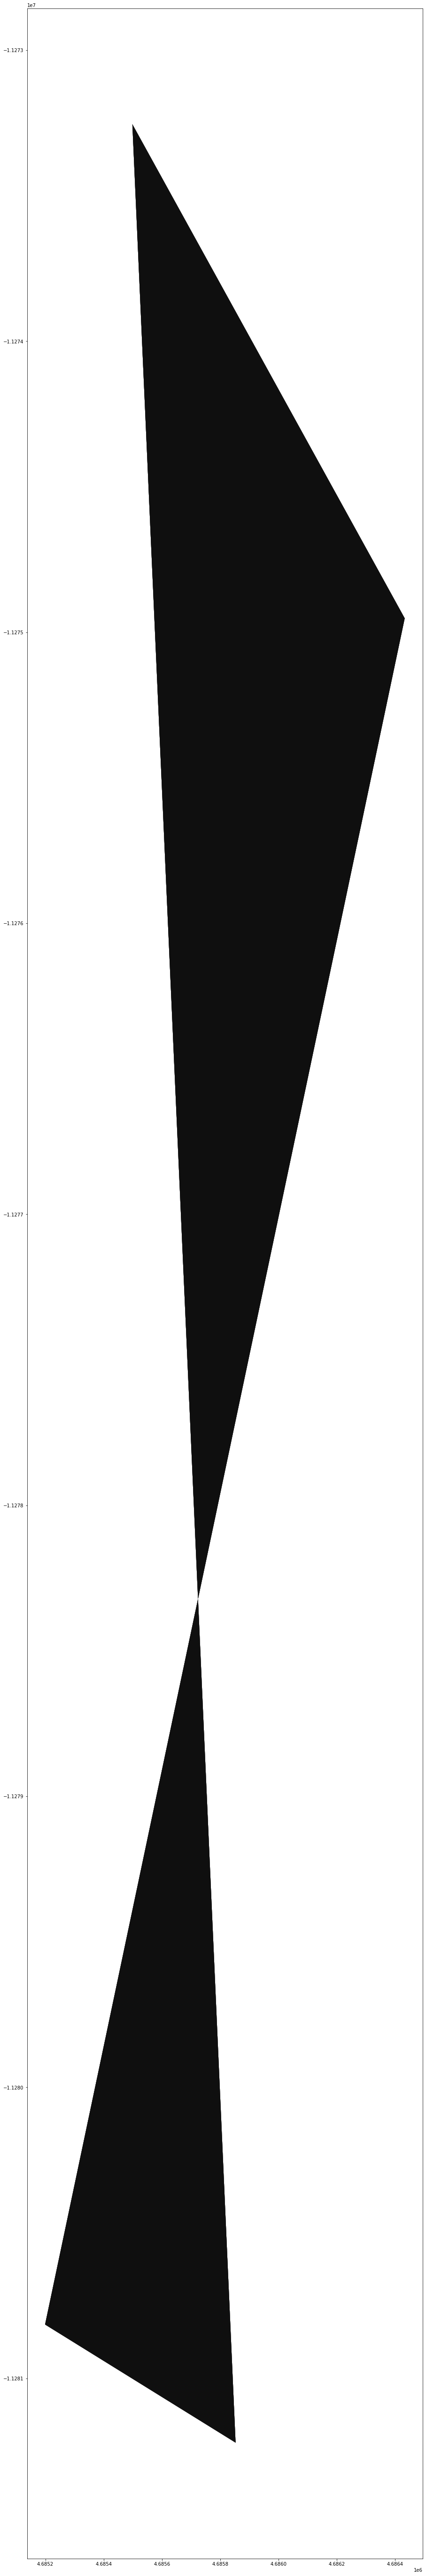

In [65]:
import contextily as ctx
# used_images = used_images.to_crs(epsg=3857)
# ax = used_images.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# ctx.add_basemap(ax)

ax = used_images.to_crs(epsg=3857).plot(column='geometry', figsize=(100,100), alpha=0.6, cmap='binary')
ctx.add_basemap(ax url=getattr(ctx.sources,'ST_TONER_LITE'))


In [18]:
import open3d as o3d
from open3d import JVisualizer

pcd = o3d.io.read_point_cloud("mass/reconstruction.ply")
visualizer = JVisualizer()
visualizer.add_geometry(pcd)
visualizer.show()

JVisualizer with 1 geometries